In [1]:
# first neural network with keras tutorial
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

import numpy as np
import pandas as pd

#from sklearn.model_selection import train_test_split

In [2]:
# let's load the mnist dataset and split it into train and test

mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
# # creating a pre-processing image augmentation layer that plugs directly into model

# data_augmentation = keras.Sequential(
#   [
#     keras.layers.RandomFlip("horizontal", input_shape=(28,28,1)),
#     keras.layers.RandomRotation(0.1),
#     keras.layers.RandomZoom(0.1),
#   ]
# )

In [4]:
# # Create a tf.data pipeline of augmented images (and their labels)
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# train_dataset = train_dataset.batch(16).map(lambda x, y: (data_augmentation(x), y))


In [5]:
# confirming shape of X

X_train.shape

(60000, 28, 28)

In [6]:
# dividing X by 255 to return a value between 0 and 1, as 255 is the max rgb value of each pixel

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [7]:
# making sure images have shape (28, 28, 1)
# 

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [8]:
# converting y to one-hot encoding

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# confirming shapes again

print('X_train shape is', X_train.shape)
print('y_train shape is', y_train.shape)
print('X_test shape is', X_test.shape)
print('y_test shape is', y_test.shape)

X_train shape is (60000, 28, 28, 1)
y_train shape is (60000, 10)
X_test shape is (10000, 28, 28, 1)
y_test shape is (10000, 10)


In [10]:
# keras documentation network

# keras.backend.clear_session()

# model = keras.Sequential([
#     keras.layers.Input(shape=(28,28,1)),
#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
#     keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),

#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [11]:
# found online

keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', strides=1, padding='same', data_format='channels_last', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', strides=1, padding='same', data_format='channels_last'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    keras.layers.Dropout(0.25),


    keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', strides=1, padding='same', data_format='channels_last'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', strides=1, padding='same', data_format='channels_last'),
    keras.layers.BatchNormalization(),
    # keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    # tinker with pool_size, also look at other parameters
    # keras.layers.Dropout(0.25),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(1024, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
# # inspired by vgg16

# keras.backend.clear_session()

# model = keras.Sequential([
#     # data_augmentation,
#     keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
#     keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.Dropout(0.2),

#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.Dropout(0.2),

#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.2),

#     keras.layers.Dense(40, activation='relu'),
#     keras.layers.Dense(40, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [13]:
# # building my own AlexNet

# keras.backend.clear_session()

# model = keras.Sequential([
#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.LayerNormalization(),

#     keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.LayerNormalization(),

#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.5),

#     keras.layers.Dense(50, activation='relu'),
#     keras.layers.Dense(50, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [14]:
# let's build a convolutional neural net, as this works best with image classifiers

# keras.backend.clear_session()

# model = keras.Sequential([
#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.Dropout(0.25),

#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.Dropout(0.25),

#     keras.layers.Flatten(),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                        

In [16]:
optimizer = keras.optimizers.Adam(lr=0.003)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [17]:
# adding callback to stop training after validation_loss or validation_accuracy stop increasing with patience = 6

callback_val_loss = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
)

callback_val_accuracy = keras.callbacks.EarlyStopping(
    monitor="vall_accuracy",
    patience=6,
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

In [18]:
batch_size = 128
epochs = 100


history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[callback_val_loss, reduce_lr],
                    validation_split=0.1
                    )

Epoch 1/100


422/422 [==============================] - 15s 33ms/step - loss: 0.2145 - accuracy: 0.9386 - val_loss: 0.1772 - val_accuracy: 0.9478 - lr: 0.0010
Epoch 2/100
422/422 [==============================] - 15s 36ms/step - loss: 0.0760 - accuracy: 0.9770 - val_loss: 0.0511 - val_accuracy: 0.9867 - lr: 0.0010
Epoch 3/100
422/422 [==============================] - 16s 37ms/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0417 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 4/100
422/422 [==============================] - 17s 39ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0396 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 5/100
422/422 [==============================] - 17s 39ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0431 - val_accuracy: 0.9903 - lr: 0.0010
Epoch 6/100
422/422 [==============================] - 16s 39ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0369 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 7/100
422/422 [==============================] - 16s 39ms/

KeyboardInterrupt: 

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

NameError: name 'history' is not defined

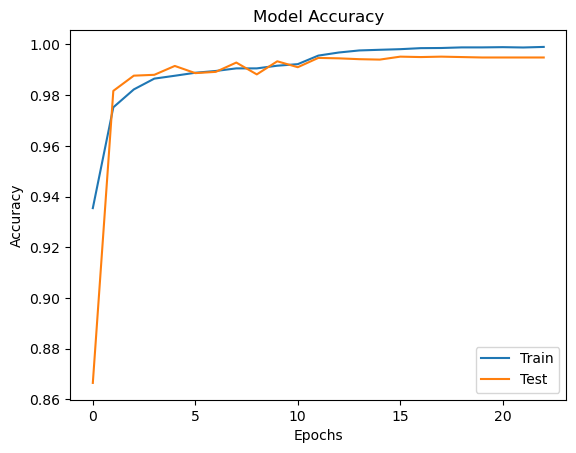

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03925596922636032
Test accuracy: 0.9897000193595886


313/313 [==============================] - 3s 8ms/step


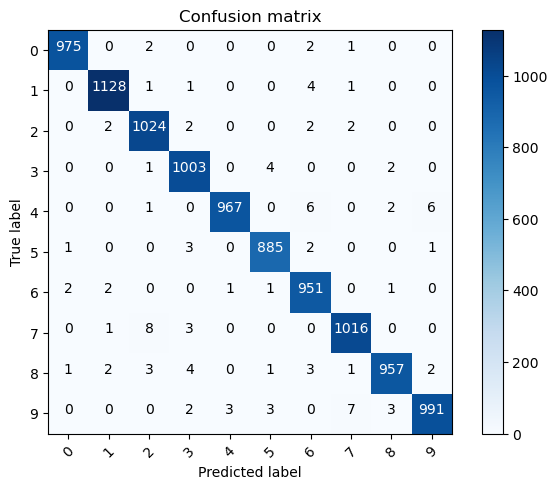

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [22]:
# reults with keras documentation network: 99.2
# results with AlexNet v1 (50x50 dense): 99.0
# results with AlexNet v1 (100x100 dense): 98.9
# results with AlexNet v1 (25x25 dense): 98.6
# results with VGG16 style: 99.41 (loss 0.018311500549316406)

# VGG16 style after adding callbacks (99.55)
# random online person (99.6)

TypeError: Invalid shape (3, 3, 1, 16) for image data

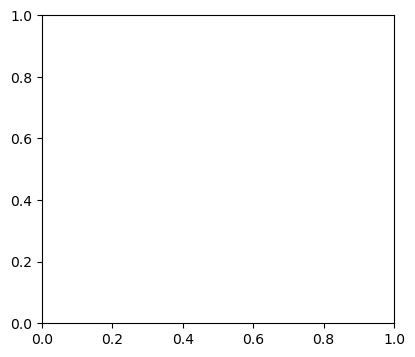

In [23]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Keras model
for layer in model.layers:
    weights = layer.get_weights()
    if len(weights) > 0:
        # weights[0] are the weights, weights[1] are the biases (if present)
        plt.figure(figsize=(10, 4))

        # Plotting the weights
        plt.subplot(1, 2, 1)
        plt.imshow(weights[0], aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f"Weights of {layer.name}")

        # Plotting the biases if they exist
        if len(weights) > 1:
            plt.subplot(1, 2, 2)
            plt.plot(weights[1])
            plt.title(f"Biases of {layer.name}")

        plt.show()
